# Slalomist

## Ocena 6

Sestavi razred `Steza`.

- Konstruktor prejme tri argumente: širino in višino kolesarske steze ter seznam s terkami ovir (y, x0, x1). Argument s širino in višino vsebuje številko zadnjega stolpca oz. vrstice kolesarske steze. Dovoljeni stolpci so torej od 1 do (vključno) širina. Vrstice so oštevilčene od zgoraj navzdol.
- `zaprto(x, y)` vrne `True`, če na polju s podanimi koordinatami stoji ovira.
- `konec(x, y, smer)` prejme koordinati nekega polja (na katerem ni ovire) in smer, ki je `>`, `<`, `v` ali `^`. Vrniti mora koordinati polja, na katerem bi se ustavil kolesar, ki bi s podanega polja peljal v podano smer. Ustavi se na polju pred oviro oz. na polju pred robom kolesarske steze.

### Rešitev

Lahko, recimo, tako.

In [1]:
class Steza:
    def __init__(self, sirina, visina, ovire):
        self.sirina = sirina
        self.visina = visina
        self.ovire = ovire

    def zaprto(self, x, y):
        return any(y == y0 and x0 <= x <= x1 for y0, x0, x1 in self.ovire)

    def konec(self, x, y, smer):
        dx, dy = {">": (1, 0), "<": (-1, 0), "v": (0, 1), "^": (0, -1)}[smer]

        while 0 < x <= self.sirina and 0 < y <= self.visina and not self.zaprto(x, y):
            x += dx
            y += dy
        x -= dx
        y -= dy
        return x, y

- Konstruktor si zapomni vse, kar mu podamo.
- V `zaprto` smo uporabili `any` in generator. Konec semestra je, dvoolj smo že stari, to znamo.
- V `konec` rinemo v podano smer, dokler gre; ko se znajdemo izven polja ali v oviri, stopimo korak nazaj. To deluje, ker vemo, da se bo zanka izvedla vsaj enkrat, saj naloga zagotavlja, da na začetnem polju ni ovire.

## Ocena 7

Sestavi razred `Kolesar`.

- Konstruktor prejme koordinati `x`, `y` in kolesarsko stezo - objekt razreda `Steza`.
- `pozicija()` vrne trenutni koordinati (`(x, y)`) kolesarja.
- `premik(smer)` premakne kolesarja v podani smeri do polja, ko se mora ustaviti, ker naleti na oviro ali rob kolesarske steze. Če premik v podano smer ni možen, se kolesar ne premakne. Metoda ne vrne ničesar.

    Predpostavlja se, da bo metoda uporabila metodo `konec` podane steze. Če je ne bo, bodo testi javili napako.

- `prevozeno()` vrne skupno prevoženo razdaljo.

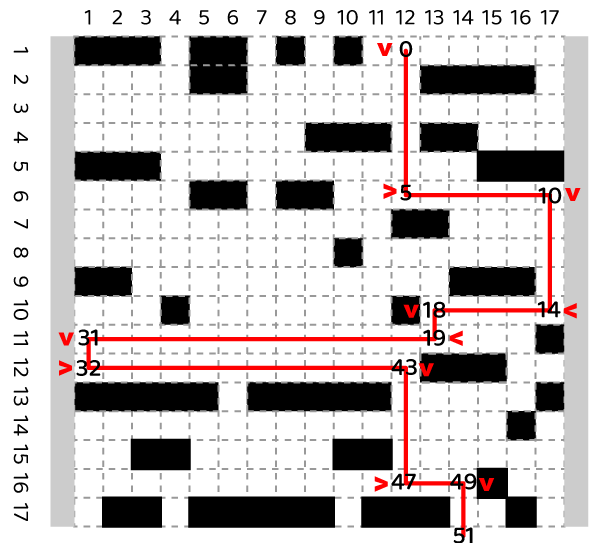

Program (`ovire` so seznam ovir kot v prejšnji nalogi)

```python
steza = Steza(17, 18, ovire)
kolesar = Kolesar(12, 1, steza)
kolesar.premik("v")
kolesar.premik(">")
kolesar.premik("v")
kolesar.premik("<")
kolesar.premik("v")
kolesar.premik("<")
kolesar.premik("v")
kolesar.premik(">")
kolesar.premik("v")
kolesar.premik(">")
kolesar.premik("v")
kolesar.premik(">")
kolesar.premik("v")
```

mora voziti kolesarja, kot kaže slika. Številke kažejo prevožene razdalje.

### Rešitev

Konstruktor si zapomni, kar mu je bilo podano, in nastavi števec na 0. Števcu bi radi rekli `self.prevozeno`, vendar ne smemo, ker je to že ime metode. Atribut `prevozeno` bi povozil metodo `prevozeno` in potem bi dobivali napake v slogu, da `int` ni "callable" - vsak, ki bi hotel poklicati *metodo* `prevozeno` bi namreč poklical `int` `prevozeno`.

Ena od možnih rešitev je, da na začetek imena atributa dodamo podčrtaj. S tem tudi nakažemo, da je atribut nekako "privaten".

In [2]:
class Kolesar:
    def __init__(self, x, y, steza: Steza):
        self.x = x
        self.y = y
        self.steza = steza
        self._prevozeno = 0

    def premik(self, smer):
        nx, ny = self.steza.konec(self.x, self.y, smer)
        self._prevozeno += abs(self.x - nx) + abs(self.y - ny)
        self.x, self.y = nx, ny

    def pozicija(self):
        return self.x, self.y

    def prevozeno(self):
        return self._prevozeno

Metode `pozicija` in `prevozeno` ne počneta ničesar posebnega. Bistvo je v metodi `premik`. Ta uporabi `self.steza.konec`, da izve novi koordinati kolesarja. V `self._prevozeno` dodamo razdaljo, ki jo dobimo kot absolutno vrednost razlike med novim in starim x ter novim in starim y. Eden od teh bo vedno nič, vendar nas ta nič nič ne boli.

Pazi: pravilen klic je `self.steza.konec(...)` in ne `Steza.konec(self.steza, ...)`. To, drugo, sicer deluje, vendar je grdo, nenavadno, neugledno, neprimerno. Tako ne programiramo.

## Ocena 8

Sestavi razred `AvtonomniKolesar`, ki je izpeljan iz razreda kolesar.

- Konstruktor prejme enake argumente kot kolesar, poleg tega pa še argument `načrt`, ki je niz, sestavljen iz znakov `<` in `>`.
- Metoda `premik` ne prejme argumentov (razen `self`) in počne naslednje.

    - Ko jo pokličemo prvič, se kolesar odpelje dol (če more; če ne more, ne naredi ničesar). Pelje se, kolikor daleč dol se more. (Uporabi podedovano metodo `premik`!)
    - Ko jo pokličemo naslednjič, se odpelje (kolikor daleč se more) v smer, ki jo narekuje prvi korak (= prvi znak) načrta, ki ga je dobil konstruktor.
    - Ko jo pokličemo naslednjič, se odpelje dol.
    - Ko jo pokličemo naslednjič, se odpelje v smeri drugega koraka (znaka) načrta.
    - Ko jo pokličemo naslednjič, se odpelje dol.
    - ... in tako naprej. **Če zmanjka načrta, ga začne ponavljati od začetka.**

    Z drugimi besedami kolesar se izmenično premika dol in v smeri, ki jo daje načrt.

    Metoda `premik` mora na primeren način klicati podedovano metodo `premik`.

Tole pelje kolesarja po poti iz prejšnje slike. Načrt je predolg in se pač ne izvede do konca.

```python
steza = Steza(17, 18, ovire)  # kjer so ovire seznam ovir kot v prejšnji nalogi
kolesar = AvtonomniKolesar(12, 1, steza, "><<>><>")
```

### Rešitev

Kolesar mora vedeti do kod v načrtu, oziroma kateri bo naslednji uporabljeni znak načrta. Poleg tega mora vedeti, ali se mora premakniti dol ali iti, kot pravi načrt.

Ena rešitev je takšna.

In [3]:
class AvtonomniKolesar(Kolesar):
    def __init__(self, x, y, steza, nacrt):
        super().__init__(x, y, steza)
        self.nacrt = nacrt
        self.dol = True
        self.korak = 0

    def premik(self):
        if self.dol:
            super().premik("v")
        else:
            super().premik(self.nacrt[self.korak])
            self.korak += 1
            if self.korak == len(self.nacrt):
                self.korak = 0
        self.dol = not self.dol

- `self.dol` je `True`, če bo naslednji korak `"v"` in `False`, če bomo uporabili znak iz načrta. V vsakem premiku ga "obrnemo" s `self.dol = not self.dol`.
- `self.korak` pove, kateri znak iz načrta je na vrsti. V `premik` ga povečamo za `1`, vsakič, ko gremo po načrtu. Če pride do konca, ga postavimo nazaj na 0.

Kot to sklenemo, je preprosto: premik preveri, ali je potrebno iti `dol`. Če je tako, gre dol, sicer po načrtu.

Lahko pa bi šteli vsak korak. V tem primeru gremo ob sodih korakih dol, ob lihih po načrtu. Uporabljeni znak načrta dobimo tako, da `self.korak` delimo z `2` (deljenje bo vedno zaokrožilo navzdol, kar je dobro) in potem vzamemo ostanek po deljenju z dolžino načrta, s čimer dosežemo, da se načrt, po tem, ko pridemo do konca, ponovi od začetka.

In [4]:
class AvtonomniKolesar(Kolesar):
    def __init__(self, x, y, steza, nacrt):
        super().__init__(x, y, steza)
        self.nacrt = nacrt
        self.korak = 0

    def premik(self):
        if self.korak % 2 == 0:
            super().premik("v")
        else:
            super().premik(self.nacrt[self.korak // 2 % len(self.nacrt)])
        self.korak += 1

## Ocena 9

Sestavi razred `VzvratniKolesar`, izpeljan iz razreda `Kolesar`.

- Konstruktor dopolnjuj po potrebi.
- Metodo `premik` dopolnjuj po potrebi. Pri tem uporabljaj podedovano metodo premik; ne piši vsega od začetka.
- Metoda `nazaj` se vede kot "undo": kolesarja vrne za en korak nazaj, torej v stanje, v kakršnem je bil pred klicem metode `premik`. To spremeni njegove koordinate, pa tudi prevožena razdalja se zmanjša. Učinek je torej enak, kot da ne bi bilo zadnjega premika.

    Metodo `nazaj` lahko pokličemo tudi večkrat zapored; kolesarja lahko vrnemo čisto do njegove začetne pozicije. Če kličemo metodo `nazaj` takrat, ko smo ga že vrnili do začetka, metoda ne stori ničesar.
    
### Rešitev

To je veliko lažje, kot je videti (in kot je pričakovati za oceno 9). Kolesar si zapomnjuje pretekle koordinate in prevožene kvadrate. Če hočemo nazaj, preprosto povrne stanje.

In [5]:
class VzvratniKolesar(Kolesar):
    def __init__(self, x, y, steza):
        super().__init__(x, y, steza)
        self.pretekle = []

    def premik(self, smer):
        self.pretekle.append((self.x, self.y, self._prevozeno))
        super().premik(smer)

    def nazaj(self):
        if self.pretekle:
            self.x, self.y, self._prevozeno = self.pretekle.pop()

Opomniti pa moramo, da je tak način izvedbe "undo" potraten. Tule je seveda popolnoma vseeno, običajno pa si mora undo zapomniti spremembo. Navadno undo shrani akcijo, ki ga pripelje nazaj v prejšnje stanje in akcijo, ki ga pripelje nazaj nazaj (redo).

## Ocena 10

Sestavi razred `PametniKolesar` izpeljan iz razreda `VzvratniKolesar`.

Razred ima metodo `nacrt`, ki poišče najkrajšo pot (to je, pot z najmanjšo prevoženo razdaljo) do zadnje vrstice. Kolesar se lahko premika le levo, desno in dol, pri čemer se, tako kot v prejšnjih nalogah, vedno pelje, dokler ne pride do ovire ali do roba poti.

Funkcija mora vrniti par - dolžino prevožene poti in niz s potjo. Če pot z neke točke ni možna, funkcija vrne par `(`None`, "")`.

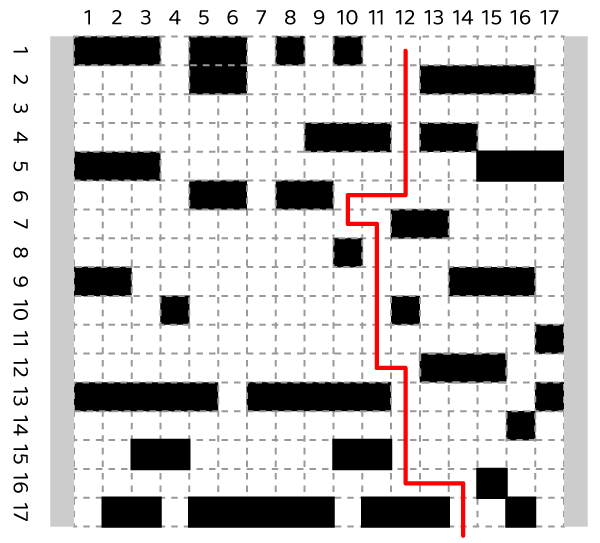

```python
steza = Steza(17, 18, ovire)
kolesar = PametniKolesar(12, 1, steza)
print(kolesar.nacrt())
```

izpiše

```
(23, 'v<v>v>v>v')
```

Pot je na sliki. Ne spreglej: pot bi bila sicer krajša, če bi se kolesar z (12, 6) ne bi šel do (10, 6), temveč bi se že na pol poti, torej na (11, 6), obrnil navzdol. Vendar tega ne more, ker se vedno pelje do polja, kjer ga ustavi ovira ali rob.

Nasvet: da se kolesar ne bo zaciklal, premiku levo nikoli ne sme slediti premik desno oz. obratno. Najbrž je najpreprosteje, da funkciji dodate argument s privzeto vrednostjo, ki bo povedal, ali je bil zadnji premik navzdol. Druga, morda še preprostejša možnost je, da funkciji dodate argument `pot`, ki beleži doslejšnje premike - ob vsakem rekurzivnem klicu dodate zadnjo smer. Ni najlepše, ampak dela. Tretja možnost je, da rekurzijo napišete tako, da funkcija v vsakem klicu naredi korak dol in desno.

Pazite tudi na tole: če premik ne naredi ničesar (smo nad oviro in hočemo dol?) naj mu ne sledi rekurzivni klic.

### Rešitev


Moja rešitev, ki ni nujno najpreprostejša, je takšna.

In [6]:
class PametniKolesar(VzvratniKolesar):
    def nacrt(self, pot=""):
        if self.y == self.steza.visina:
            return self.prevozeno(), pot

        x, y = self.x, self.y
        self.premik("v")
        mozne = []
        if y != self.y:
            mozne.append(self.nacrt(pot + "v"))
        self.nazaj()
        
        if not pot or pot[-1] == "v":
            self.premik("<")
            if x != self.x:
                mozne.append(self.nacrt(pot + "<"))
            self.nazaj()
        
            self.premik(">")
            if x != self.x:
                mozne.append(self.nacrt(pot + ">"))
            self.nazaj()
        return min((x for x in mozne if x[0] is not None), default=(None, ""))

Funkcija v rekurzivnem klicu dopolnjuje `pot`, da ve, kakšen je bil zadnji korak. In ker jo ravno ima, jo na koncu tudi vrne, prav tako pa vrne število prevoženih kvadratkov.

Če ni na koncu pa poskusi vse tri možne smeri, si zapomni rezultat in naredi korak nazaj. Smeri levo in desno seveda preskusi le, če je zadnja smer na poti dol.

Na koncu funkcije poiščemo minimum izmed vse rešitev, ki pripeljejo do cilja (`x[0] is not None`), kot privzeto vrednost (če nobena smer ni pripeljala do cilja) pa vrnemo `(None, "")`.